In [38]:
import numpy as np  
import matplotlib.pyplot as plt

In [39]:
def trace_cercle(a, b, r):
    t = np.linspace(0, np.pi*2,30)
    x = a + np.cos(t)*r
    y = b + np.sin(t)*r
    plt.plot(x,y,'r:')
   
    
def trace_droite(pente, b):
    x = np.linspace(xmin, xmax,30)
    y = pente*x + b
    plt.plot(x,y,'b:')
 
    
def matP_homogene(matP):  
    # la matrice des points écrits en coordonnées homogènes
    nP=matP.shape[1] 
    matP_h = np.concatenate((matP,np.ones((1,nP))),0)
    return matP_h


def affiche_polygone(matP, string):
## en ajoutant le point final    
#    pointdebut=matP[:,0]
#    pointdebut=pointdebut.reshape(pointdebut.shape[0],1)
#    matP=np.concatenate((matP,pointdebut),1)
#    # on peut faire directement cela :
    x = matP[0, :]
    y = matP[1, :]
    plt.plot(x, y, string)


def mat_Rotation_h(theta):
    mat = np.array([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])
    return mat


def mat_Translation_h(tx,ty):
    mat = np.array([[1, 0, tx],
                    [0, 1, ty],
                    [0, 0, 1]])
    return mat


def mat_Reflexion_axe1():
    mat = np.array([[1, 0, 0],
                    [0, -1, 0],
                    [0, 0, 1]])
    return mat


def mat_Scale_h(sx,sy):
    mat = np.array([[sx, 0, 0],
                    [0, sy, 0],
                    [0, 0, 1]])
    return mat

# Ex 1

In [175]:
plt.close()

In [176]:
plt.axis('scaled') # la position est importante
xmin, xmax = plt.xlim(-10, 30)  # pour délimiter la fenêtre
ymin, ymax = plt.ylim(-10, 25)

r=6
trace_cercle(0, 0, r)
plt.plot([0], [0], 'ro')

matP = np.array([
    [0, 1, 0, 0],
    [6, 6, 8, 6]
])

matP=matP_homogene(matP)

affiche_polygone(matP, "y-")

for i in np.linspace(0, np.pi * 2, 30)[:-1]:
    matP1 = np.dot(mat_Rotation_h(i), matP)
    affiche_polygone(matP1, "b-")

# Ex 2

In [177]:
# une matrice de points choisis aléatoirement 
# chaque coordonnée suit une loi uniforme sur l'intervalle [0,1]    
matP_alea=np.random.rand(2,20)
P_origine=np.array([[0], [0]])  # on peut ajouter l'origine à ces points
matP_alea=np.concatenate((matP_alea,P_origine),1)
matP_alea=matP_homogene(matP_alea)
affiche_polygone(matP_alea, 'k-')

# Agrandir une première fois :
matP_alea_1 = np.dot(mat_Scale_h(r, r), matP_alea)
affiche_polygone(matP_alea_1, 'y-')

In [178]:
theta = np.pi * 0.2
pente = np.tan(theta)
trace_droite(pente, 0)


matP_alea_2 = np.dot(
    mat_Translation_h(12, 12 * pente),
    np.dot(
        mat_Rotation_h(0.2),
        np.dot(
            mat_Scale_h(2, 2),
            matP_alea_1
        ),
    )
)

affiche_polygone(matP_alea_2, 'y-')

In [180]:
matP_alea_3 = np.dot(
    mat_Reflexion_axe1(),
    matP_alea_2
)
affiche_polygone(matP_alea_3, 'k-')

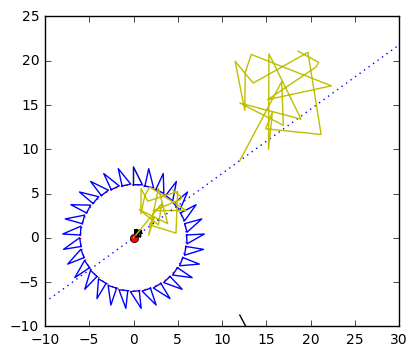

In [181]:
plt.show()